In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta

In [2]:
#configuração da plotagem dos graficos
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [3]:
usxy = ['^FVX', '^TNX','^TYX']
usxy_p = pd.DataFrame()

for u in usxy:
    usxy_p[u]=wb.DataReader(u, data_source='yahoo', start='2001-1-1')['Adj Close']

usxy_p

,^FVX,^TNX,^TYX
Date,,,
2001-01-02,4.752,4.917,5.350
2001-01-03,4.923,5.097,5.463
2001-01-04,4.808,5.013,5.435
2001-01-05,4.672,4.948,5.414
2001-01-08,4.601,4.897,5.408
...,...,...,...
2022-01-31,1.614,1.782,2.098
2022-02-01,1.624,1.800,2.124
2022-02-02,1.600,1.766,2.094


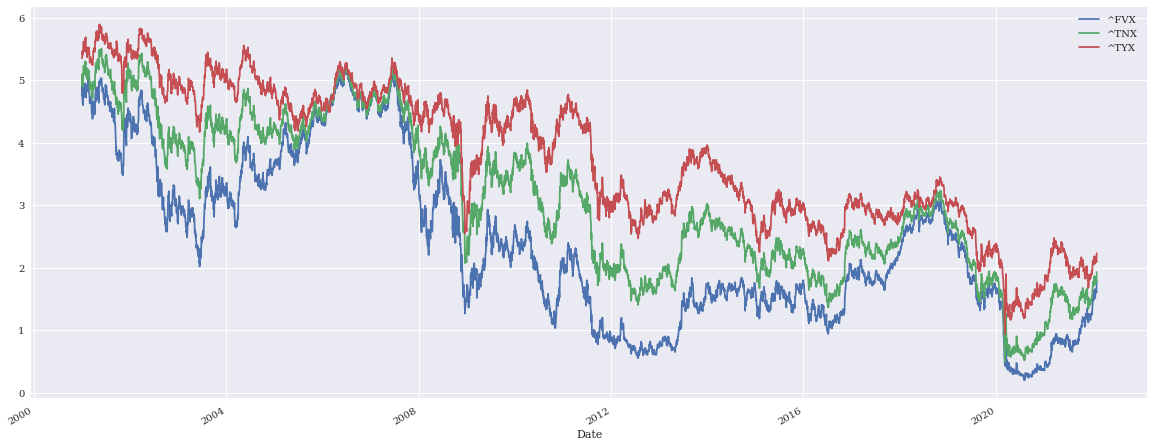

In [4]:
usxy_p.plot(figsize=(20, 8));

In [5]:
usxy_p['5-10']= usxy_p['^TNX'] - usxy_p['^FVX']
usxy_p['10-30']= usxy_p['^TYX'] - usxy_p['^TNX']

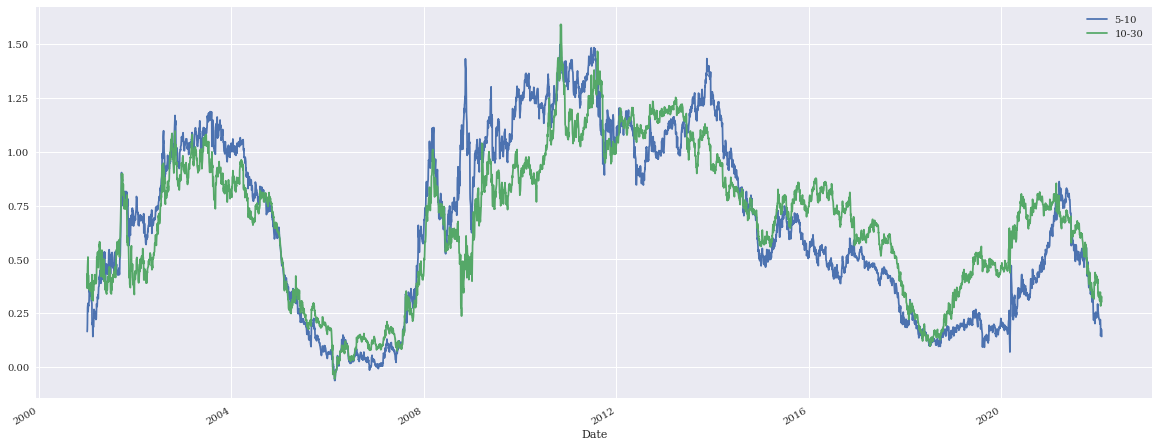

In [6]:
usxy_p[['5-10', '10-30']].plot(figsize=(20,8));

In [7]:
# uso de RSI 

In [8]:
PG_data = pd.DataFrame(wb.DataReader('PG', data_source='yahoo', start='2000-1-1')['Adj Close'])
US10Y_data = pd.DataFrame(wb.DataReader('^TNX', data_source='yahoo', start='2000-1-1')['Adj Close'])

In [9]:
PG_data.tail()

,Adj Close
Date,
2022-01-31,160.449997
2022-02-01,159.740005
2022-02-02,162.600006
2022-02-03,164.139999
2022-02-04,161.529999


In [10]:
PG_data['Dif'] = PG_data['Adj Close'].pct_change()
PG_data['RSI-9'] = ta.rsi(PG_data['Adj Close'], length=9)

PG_data['RSI-9-v'] = ta.rsi(PG_data['Dif'], length=9)

In [11]:
US10Y_data['Dif'] = US10Y_data['Adj Close'].pct_change()
US10Y_data['RSI-9'] = ta.rsi(US10Y_data['Adj Close'], length=9)

US10Y_data['RSI-9-v'] = ta.rsi(US10Y_data['Dif'], length=9)

In [48]:
pg_rsi_9 = PG_data['RSI-9-v']
pg_rsi_9 = pg_rsi_9.dropna()
arry_rsi = np.array(pg_rsi_9)

In [50]:
PG_data['RSI-9-v'].describe()

count    5550.000000
mean       49.911052
std         5.129137
min        18.312362
25%        46.794675
50%        49.882412
75%        53.079990
max        73.455691
Name: RSI-9-v, dtype: float64

In [62]:
percentile_up = np.percentile(arry_rsi, 99.5)
percentile_up

64.04091469467764

In [63]:
percentile_down = np.percentile(arry_rsi, .5)
percentile_down

34.005893419260026

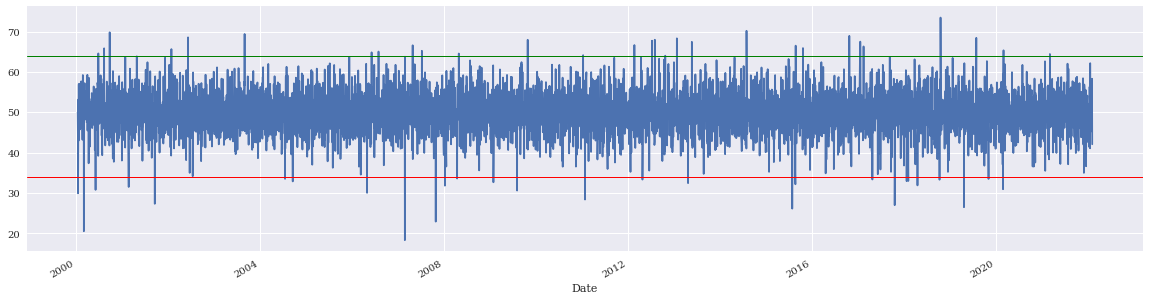

In [64]:
plt.figure(figsize=(20, 5))
PG_data['RSI-9-v'].plot()
plt.axhline(percentile_up, lw=1.0, color='g')
plt.axhline(percentile_down, lw=1.0, color='r')
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
PG_data['RSI-9'].plot()
plt.axhline(y=20, lw=1.0, color='g')
plt.axhline(y=80, lw=1.0, color='r')
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
US10Y_data['RSI-9'].plot()
plt.axhline(y=20, lw=1.0, color='g')
plt.axhline(y=80, lw=1.0, color='r')
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
US10Y_data['RSI-9-v'].plot()
plt.axhline(y=30, lw=1.0, color='g')
plt.axhline(y=70, lw=1.0, color='r')
plt.show()

In [ ]:
GOLD_F_Data = pd.DataFrame(wb.DataReader('GC=F', data_source='yahoo', start='2002-1-1')['Adj Close'])

In [ ]:
GOLD_F_Data['Dif'] = GOLD_F_Data['Adj Close'].pct_change()
GOLD_F_Data['RSI-9'] = ta.rsi(GOLD_F_Data['Adj Close'], length=9)

GOLD_F_Data['RSI-9-v'] = ta.rsi(GOLD_F_Data['Dif'], length=9)

In [ ]:
GOLD_F_Data.tail()

In [ ]:
plt.figure(figsize=(20, 5))
GOLD_F_Data['RSI-9'].plot()
plt.axhline(y=20, lw=1.0, color='g')
plt.axhline(y=80, lw=1.0, color='r')
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
GOLD_F_Data['RSI-9-v'].plot()
plt.axhline(y=35, lw=1.0, color='g')
plt.axhline(y=65, lw=1.0, color='r')
plt.show()